In [105]:
#Importing and uploading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

bids = pd.DataFrame.from_csv('C:/Users/Christopher Gardner/Documents/Python Scripts/bids.csv')
train = pd.DataFrame.from_csv('C:/Users/Christopher Gardner/Documents/Python Scripts/train.csv')

#adding final time features created by subtracting bid time from the last time in the auction. 
test_df = pd.DataFrame.from_csv('C:/Users/Christopher Gardner/Documents/Python Scripts/final_times.csv')
test_df.columns = ['f_time']
bids = bids.merge(test_df, left_on='auction', right_index=True)
bids['diff_time'] = bids.f_time - bids.time
#create proper merge
groupfirst = bids.groupby(bids.bidder_id).nunique().sort_index()
mergedsecond = groupfirst.merge(train.sort_index(), left_index=True, right_index=True)

#now sort by desired values, update ranking and then split into bots and humans for plotting
mergedsecond = mergedsecond.sort_values(by=['auction'])
mergedsecond['ranking'] = np.arange(len(mergedsecond))
mergedsecond['bids_per_auction'] = mergedsecond.time/mergedsecond.auction
bots = mergedsecond[mergedsecond.outcome==1]
humans = mergedsecond[mergedsecond.outcome==0]
mergedsecond.head()

#mergefirst
mergedfirst = bids.merge(train, left_on='bidder_id', right_index=True)
groupedsecond = mergedfirst.groupby('bidder_id').nunique()

In [102]:
mergedsecond['bids_per_auction'] = mergedsecond.time/mergedsecond.auction

In [104]:
mergedsecond.tail()

,bidder_id,auction,merchandise,device,time,country,ip,url,f_time,diff_time,payment_account,address,outcome,ranking,bids_per_auction
bidder_id,,,,,,,,,,,,,,,
f5b2bbad20d1d7ded3ed960393bec0f40u6hn,1,1256,1,2618,283463,98,101275,81376,1165,380280,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0,1979,225.687102
cffb5f3c1f4ca815d0f643fcb2f2f316beod4,1,1301,1,1040,45520,48,24901,14907,1195,47436,06602d61e71d281961c94a143471a38ei23rd,a3d2de7675556553a5f08e4c88d2c228o21d6,0.0,1980,34.988470
e9c8ee7f783723fe8496dd35232d88f2or1r1,1,1301,1,939,15722,105,5942,3363,1201,15700,a3d2de7675556553a5f08e4c88d2c228yqv23,aea8eeadeb5ded2bb1d1aa1b6f418b591f98q,0.0,1981,12.084550
d6517684989560cbb0da1fb2f5bbba9b9y2st,1,1621,1,1396,54205,137,12978,2523,1460,54575,32b760348f97730712bf5259e7abe531erkgg,43058cc45a1e3e47851faff164c27f0bnp0me,0.0,1982,33.439235
6713e820273f591bdff7d26a48ee30c5k4iii,1,1623,1,1575,64495,59,24544,21275,1540,68558,a3d2de7675556553a5f08e4c88d2c228x2qy8,a3d2de7675556553a5f08e4c88d2c228tfgez,0.0,1983,39.738139


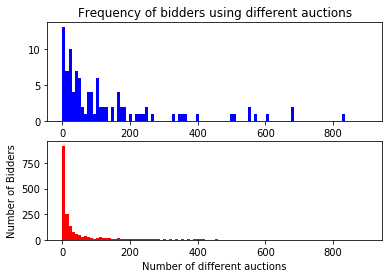

p-value:  4.70629817678e-09


In [31]:
plt.subplot(211)
plt.title('Frequency of bidders using different auctions')
plt.hist(bots.auction, color='b', range=(0,900), bins=100)
plt.subplot(212)
plt.hist(humans.auction, color='r', range=(0,900), bins=100)
plt.xlabel('Number of different auctions')
plt.ylabel('Number of Bidders')
plt.show()
print ('p-value: ', stats.ttest_ind(bots.auction, humans.auction)[1])

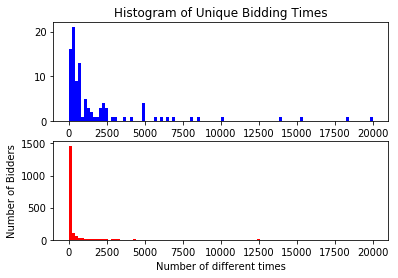

p-value:  0.0103626011864


In [34]:
plt.subplot(211)
plt.title('Histogram of Unique Bidding Times')
plt.hist(bots.time, color='b', range=(0,20000), bins=100)
plt.subplot(212)
plt.hist(humans.time, color='r', range=(0,20000), bins=100)
plt.xlabel('Number of different times')
plt.ylabel('Number of Bidders')
plt.show()
print ('p-value: ', stats.ttest_ind(bots.time, humans.time)[1])

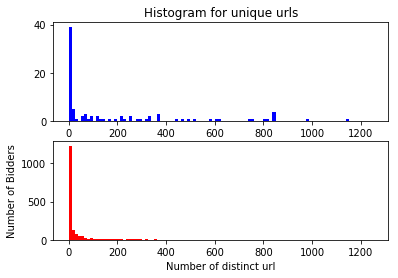

p-value:  0.43967854519


In [35]:
plt.subplot(211)
plt.title('Histogram for unique urls')
plt.hist(bots.url, color='b', range=(0,1250), bins=100)
plt.subplot(212)
plt.hist(humans.url, color='r', range=(0,1250), bins=100)
plt.xlabel('Number of distinct url')
plt.ylabel('Number of Bidders')
plt.show()
print ('p-value: ', stats.ttest_ind(bots.url, humans.url)[1])

In [66]:
bids.groupby('bidder_id').value_counts()


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [89]:
type(bids.groupby(['bidder_id', 'auction']).auction)

pandas.core.groupby.SeriesGroupBy

In [90]:
bids.groupby(['bidder_id', 'auction']).auction.size()


bidder_id                              auction
001068c415025a009fee375a12cff4fcnht8y  4ifac       1
002d229ffb247009810828f648afc2ef593rb  2tdw2       2
0030a2dd87ad2733e0873062e4f83954mkj86  obbny       1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o  cqsh6       1
                                       efh5o       1
                                       obbny       1
00486a11dff552c4bd7696265724ff81yeo9v  6plix       2
                                       9ul86       1
                                       cci6c       1
                                       drdr4       2
                                       eaz7i       1
                                       gst86       3
                                       lx0hm       1
                                       lz5gg       2
                                       nf1v1       1
                                       no958       2
                                       opnq4       2
                                       qvhei       1